In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

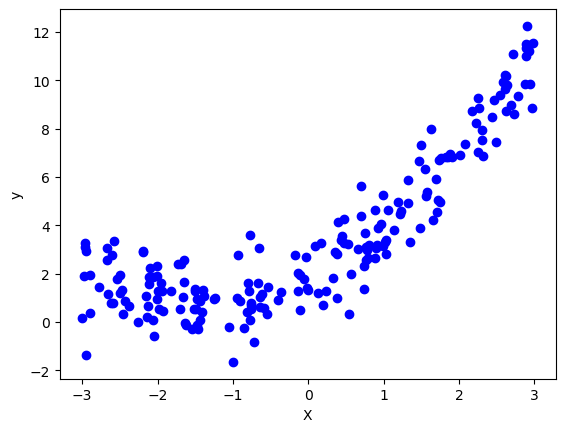

In [5]:
##quadratic equation used = 0.5x^2 + 1.5x + 2 + noise
X= 6* np.random.rand(100,1)-3
y= 0.5*X**2 + 1.5* X + 2 + np.random.randn(100,1)
plt.scatter(X,y,color='b')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
##simple linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score
score = r2_score(y_test, lin_reg.predict(X_test))
print("R2 score for linear regression is: ", score)

R2 score for linear regression is:  0.48274152212732524


In [12]:
##visualizing the linear regression results
plt.plot(X_train, lin_reg.predict(X_train), color='r')
plt.scatter(X_train, y_train, color='b')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

In [17]:
##polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


In [20]:
from sklearn.metrics import r2_score
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred = poly_reg.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print("R2 score for polynomial regression is: ", score)
print("Coefficients: ", poly_reg.coef_)
print("Intercept: ", poly_reg.intercept_)

R2 score for polynomial regression is:  0.8518326284420681
Coefficients:  [[0.         1.58040012 0.5519266 ]]
Intercept:  [1.80009573]


In [24]:
plt.scatter(X_train, poly_reg.predict(X_train_poly), color='r')

plt.scatter(X_train, y_train, color='b')
plt.show()

In [25]:
##polynomial transformation with degree 3
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [26]:
from sklearn.metrics import r2_score
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred = poly_reg.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print("R2 score for polynomial regression is: ", score)
print("Coefficients: ", poly_reg.coef_)
print("Intercept: ", poly_reg.intercept_)

R2 score for polynomial regression is:  0.8544364662266387
Coefficients:  [[0.         1.29470859 0.56334804 0.04862411]]
Intercept:  [1.77777204]


In [28]:
##predicting a new data set
X_new= np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly_features.transform(X_new)

In [30]:
y_new = poly_reg.predict(X_new_poly)
plt.plot(X_new, y_new,linewidth=2, color='r')
plt.plot(X_train, y_train, 'b.')
plt.plot(X_test, y_test, 'g.')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression with degree 3')
plt.show()
